     Ism  Yosh     Sifat  Mablag'
0    Ali    25    Yaxshi      300
1   Vali    32  O'rtacha      250
2   Olim    45    Yaxshi      700
3   Aziz    29  O'rtacha      280
4  Karim    51    Yaxshi      950
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Ism      10 non-null     object
 1   Yosh     10 non-null     int64 
 2   Sifat    10 non-null     object
 3   Mablag'  10 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 452.0+ bytes
None


<ipython-input-7-9042dac9dad3>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sifat", palette="deep")


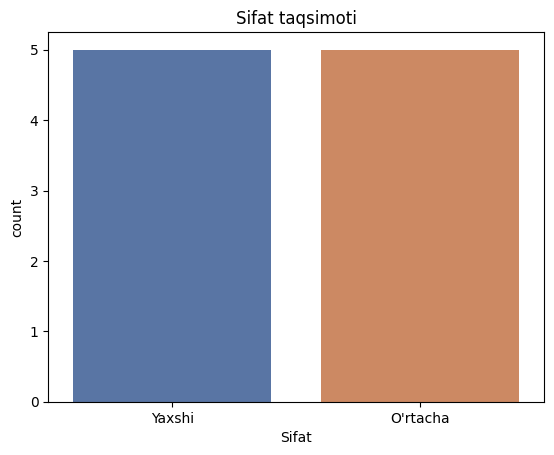

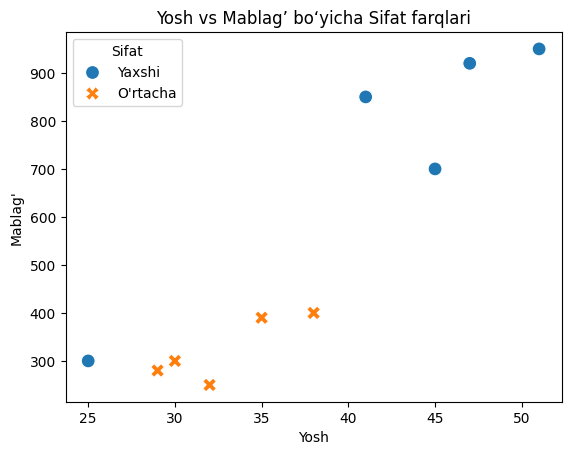

MSE (O'rtacha kvadrat xatolik): 5044.636280276814
   Haqiqiy    Bashorat
0      920  847.741176
1      250  319.770588


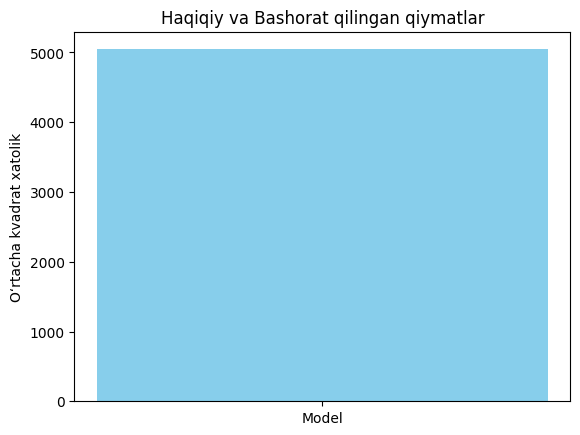

In [7]:
# 📦 Kutubxonalarni chaqiramiz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# 📄 Sun'iy ma'lumotlar yaratamiz
data = {
    "Ism": ["Ali", "Vali", "Olim", "Aziz", "Karim", "Said", "Anvar", "Shox", "Dilshod", "Nodir"],
    "Yosh": [25, 32, 45, 29, 51, 38, 41, 30, 47, 35],
    "Sifat": ["Yaxshi", "O'rtacha", "Yaxshi", "O'rtacha", "Yaxshi", "O'rtacha", "Yaxshi", "O'rtacha", "Yaxshi", "O'rtacha"],
    "Mablag'": [300, 250, 700, 280, 950, 400, 850, 300, 920, 390]
}
df = pd.DataFrame(data)

# 🧹 Ma'lumotlar haqida qisqacha
print(df.head())
print(df.info())

# 🎨 Sifat ustunining ko‘rinishi
sns.countplot(data=df, x="Sifat", palette="deep")
plt.title("Sifat taqsimoti")
plt.show()

# 📊 Yoshi va Mablag’ni chizish
sns.scatterplot(data=df, x="Yosh", y="Mablag'", hue="Sifat", style="Sifat", s=100)
plt.title("Yosh vs Mablag’ bo‘yicha Sifat farqlari")
plt.show()

# 🔄 Kategorik ustunni raqamlash
df["Sifat"] = df["Sifat"].map({"Yaxshi": 1, "O'rtacha": 0})

# 🎲 Trening va test to‘plami
X = df[["Yosh", "Sifat"]]
y = df["Mablag'"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📈 Modelni yaratish va o‘rgatish
model = LinearRegression()
model.fit(X_train, y_train)

# 🔍 Bashorat va xatolik
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE (O'rtacha kvadrat xatolik):", mse)

# 📉 Haqiqiy va bashorat qiymatlarini taqqoslaymiz
comparison = pd.DataFrame({
    "Haqiqiy": y_test.values,
    "Bashorat": y_pred
})
print(comparison)

# 🎯 O‘rtacha xatolikni vizual tarzda ko‘rsatish
plt.bar(["Model"], [mse], color="skyblue")
plt.ylabel("O‘rtacha kvadrat xatolik")
plt.title("Haqiqiy va Bashorat qilingan qiymatlar")
plt.show()
